# MineCraft Data Analysis - DSCI-100-008 (Group 6)

## 1. Introduction

The data used in this analysis is from a computer science research group led by Frank Wood at UBC. Their goal was to better understand how people play games in order to train AI to converse with players. This was done by setting up a MineCraft server where players who decide to sign up would have their gameplay data collected.

To get a better understanding of how people played the game, one of the questions they asked was:

**"We would like to know which 'kinds' of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."**

To answer this, the research question we decided to investigate was:

**To what extent do age (in years) and total hours played predict whether a player is classified as an experienced player?**

This will address the broad question by seeing if there is a possible relationship between a players age and/or total gameplay duration and what their experience level is. Here, we will use both age and total gameplay duration to analyze the different kinds of players. Additionally, we will make the assumption that the experience level group (amateur, beginner, regular, pro, and veteran) with the highest number of players will contribute the most data. For example, if most of the players are classified as a beginner, they would be the targeted players.

**Data Description: Players Data**

This dataset contains 196 player records and 7 variables, collected directly from a Minecraft server. We are only exploring this dataset as the sessions dataset will not be used in our report.

**Variables** 

| Variable Name | Type      | Meaning                                                            |
|---------------|-----------|------------------------------------------------------------------  |
| `experience`  | character | Player’s self-reported experience (Pro, Veteran, Amateur, Regular) |
| `subscribe`   | logical   | Whether the player is subscribed to the newsletter                 |
| `hashedEmail` | chr       | Hashed email to link players to sessions                           |
| `played_hours`| dble      | Hours played on the server                                         |
| `name`        | chr       | Player’s preferred name                                            |
| `gender`      | chr       | Player’s preferred gender                                          |
| `age`         | dbl       | Player’s age                                                       |

**Missing Values or Inconsistencies**

Some players have incomplete or unusual data. For example, Ahmed lists gender as “Other” but has no age, so this entry may need to be removed. Devin did not report an age but did provide a gender, meaning their data can still be used for gender-based analysis but not for age-related work. A few players reported rare gender identities, which may lead to uneven category sizes when comparing groups.

**Potential Issues Not Visible**

Because the information is self-reported, it may include inaccuracies in age, experience, or playing habits. The dataset may also overrepresent active players, which can bias any conclusions about the overall server community. Finally, errors in hashed email values could interfere with linking players to their play sessions.

## 2. Methods & Results

This section outlines the full visualization and analytical process used to investigate the research question: 

**To what extent do age (in years) and total hours played predict whether a player is classified as an experienced player?** 

To address this question, we first prepare and clean the data to ensure that age, total hours played, and a binary experience classification can be analyzed reliably. We then compute basic summary statistics to understand the overall characteristics of the dataset. Following this, a series of visualizations are generated - each designed to explore the distribution of the predictor variables, compare them across experience groups, and examine how age and hours played relate to one another. Together, these subsections provide the foundational descriptive analysis necessary to later evaluate how strongly age and hours played may predict whether a player is experienced.


**Loaded Required Packages and Data:**

The first step of the analysis was to load the necessary R packages, including tidyverse, janitor, dplyr, ggplot2, and readr, which collectively provide tools for data manipulation, cleaning, and visualization. The code then imports two datasets - players.csv and sessions.csv and cleans their column names using clean_names() for consistency. Previewing the first few rows of each dataset allows us to verify that the files loaded correctly and that key variables such as age, played_hours, and experience are present. This initial step establishes a reliable foundation for all subsequent analysis.

In [2]:
library(tidyverse)
library(tidymodels)
library(janitor)
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(scales)

players_url <- "https://raw.githubusercontent.com/gaida123/dsci-100-008-group-6/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/gaida123/dsci-100-008-group-6/refs/heads/main/sessions.csv"

players <- read_csv(players_url) |> clean_names()
sessions <- read_csv(sessions_url) |> clean_names()

players |> head()
sessions |> head()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


<br>

**Data Wrangling and Cleaning for Planned Analysis:**

Before conducting statistical analysis, the data required several transformations to ensure it matched the needs of the research question. For this reasearch question we only need players.csv. The code first selects only the variables relevant to predicting player experience - experience, age, and played_hours. Missing values in played_hours are replaced with zeros so that non-playing participants are still represented. Next, a new binary variable is created: experienced_binary.

- “Experienced” includes Pro and Veteran players.

- “Inexperienced” includes Amateur, Regular, and Beginner players.

This transformation is essential, because the research question requires predicting experienced vs. inexperienced, not the original multi-category labels. All subsequent visualizations and analyses use this cleaned dataset.

In [3]:
data_players <- players |>
  select(experience, age, played_hours) |>
  mutate(experience = factor(experience),
  played_hours = replace_na(played_hours, 0),
  experienced_binary = case_when(experience %in% c("Pro", "Veteran") ~ "Experienced",
                                  experience %in% c("Amateur", "Regular", "Beginner") ~ "Inexperienced",
                                 TRUE ~ NA_character_),
  experienced_binary = factor(experienced_binary,
                                levels = c("Inexperienced", "Experienced")))

head(data_players)

experience,age,played_hours,experienced_binary
<fct>,<dbl>,<dbl>,<fct>
Pro,9,30.3,Experienced
Veteran,17,3.8,Experienced
Veteran,17,0.0,Experienced
Amateur,21,0.7,Inexperienced
Regular,21,0.1,Inexperienced
Amateur,17,0.0,Inexperienced


**Summary Statistics:**

Summary statistics are calculated for both age and total hours played, including the mean and standard deviation of each variable. This provides a quick understanding of the central tendency and variability within the dataset.These descriptive statistics help contextualize later plots and confirm that the two predictors (age and hours played) have enough variation to meaningfully model experience classification.

In [4]:
data_players_summary <- data_players |>
    summarize(mean_age = mean(age, na.rm = TRUE),
    sd_age = sd(age, na.rm = TRUE),
    mean_hours = mean(played_hours, na.rm = TRUE),
    sd_hours = sd(played_hours, na.rm = TRUE))
data_players_summary

mean_age,sd_age,mean_hours,sd_hours
<dbl>,<dbl>,<dbl>,<dbl>
21.13918,7.389687,5.845918,28.35734


<br>

**Visualization 1 - Distribution of Total Hours Played Across All Players:**

This code produces a histogram of the played_hours variable. The purpose of this visualization is to examine the overall distribution of hours played among all players - specifically whether the distribution is symmetric, skewed, or contains outliers. Understanding this distribution is crucial for the research question because total hours played is one of the two predictor variables. Any irregularities or skewness in this data informs how well hours played can differentiate between experienced and inexperienced players. 

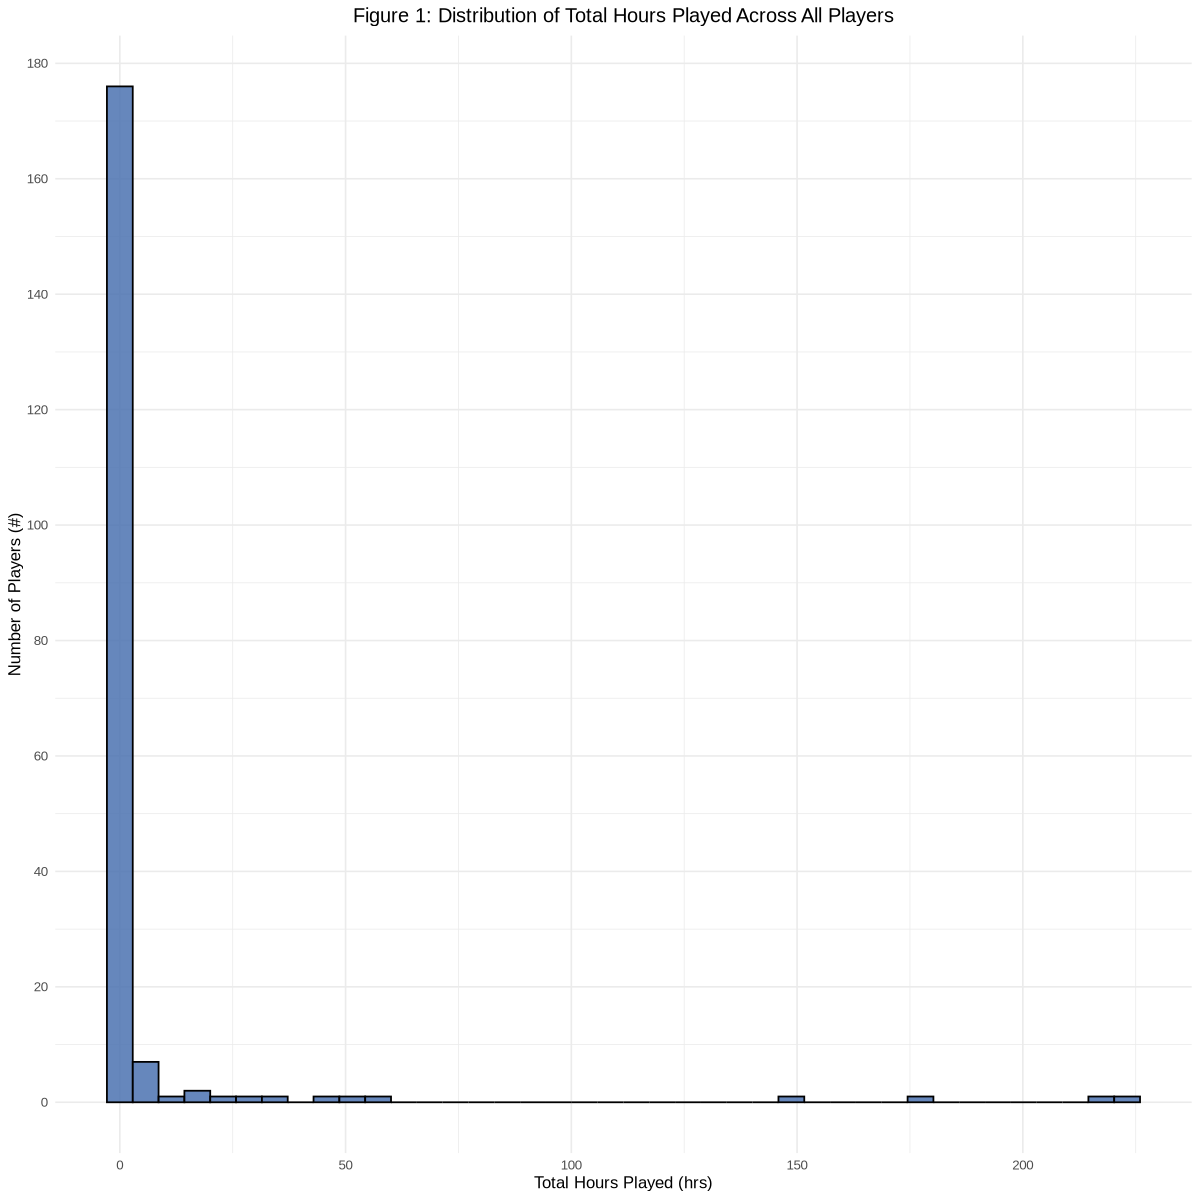

In [5]:
options(repr.plot.width = 10, repr.plot.height = 10)

vis1_hours_distribution <- data_players |>
  ggplot(aes(x = played_hours)) +
  geom_histogram(bins = 40,
                 fill = "#4C72B0",
                 color = "black",
                 alpha = 0.85) +
  scale_y_continuous(n.breaks = 10) +
  labs(title = "Figure 1: Distribution of Total Hours Played Across All Players",
       x = "Total Hours Played (hrs)",
       y = "Number of Players (#)") +
  theme_minimal(base_size = 10) +
  theme(plot.title = element_text(hjust = 0.5))

vis1_hours_distribution

<br>

**Visualization 2 — Comparison of Age by Experience Level:**

This section generates a boxplot comparing the age of experienced and inexperienced players. The code organizes the data by the binary experience classification and plots the distribution of ages for each group. This visualization helps determine whether age differs meaningfully between experience groups, which directly supports assessing whether age is a meaningful predictor in the research question. If the boxplots show separation or differences in variability, this signals potential predictive value.

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


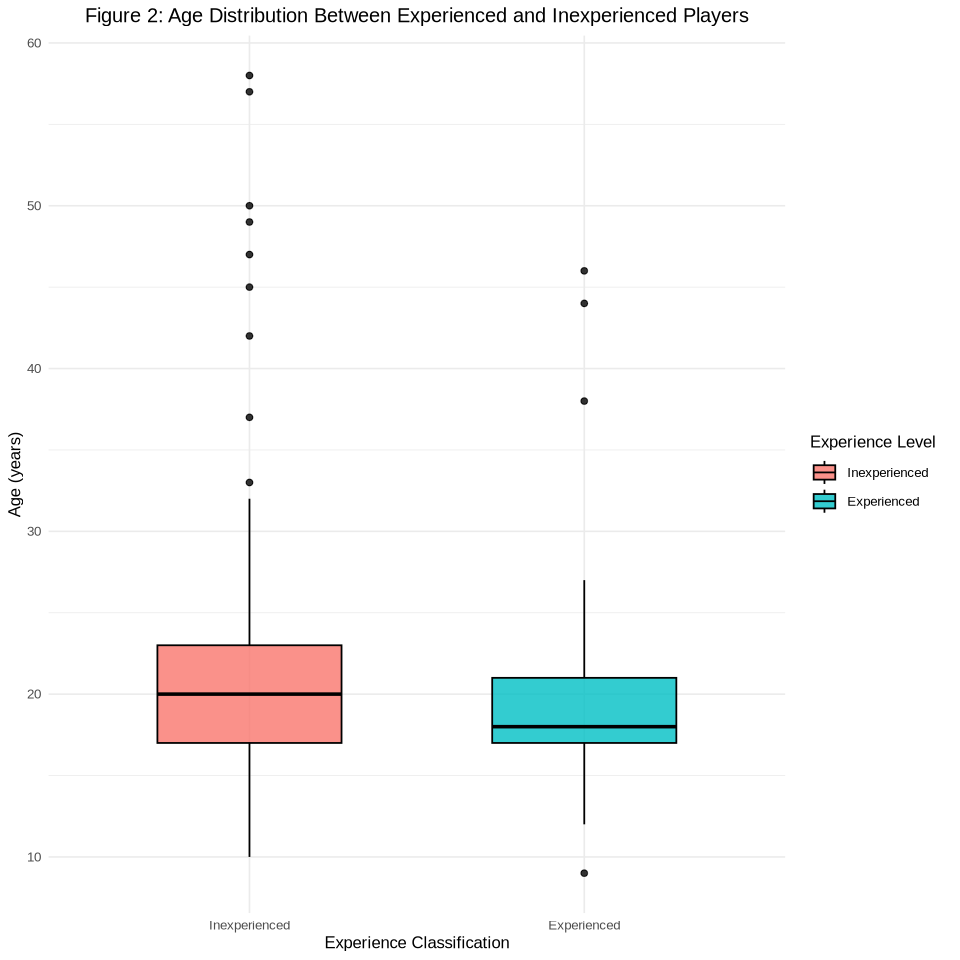

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8)

vis2_age_experience <- data_players |>
  ggplot(aes(x = experienced_binary, y = age, fill = experienced_binary)) +
  geom_boxplot(alpha = 0.8, width = 0.55, color = "black") +
  labs(title = "Figure 2: Age Distribution Between Experienced and Inexperienced Players",
           x = "Experience Classification",
           y = "Age (years)",
        fill = "Experience Level") +
  theme(legend.position = "right") +  
  theme_minimal(base_size = 10) +
  theme(plot.title = element_text(hjust = 0.5))

vis2_age_experience

<br>

**Visualization 3 - Total Hours Played by Experience Level:**

The next boxplot compares total hours played across experienced and inexperienced players. Because total hours played is a key predictor in the research question, this visualization helps reveal whether experienced players tend to accumulate more hours than inexperienced players. By comparing medians, ranges, and the presence of outliers, this plot supports evaluating whether hours played is likely to predict the experience classification.

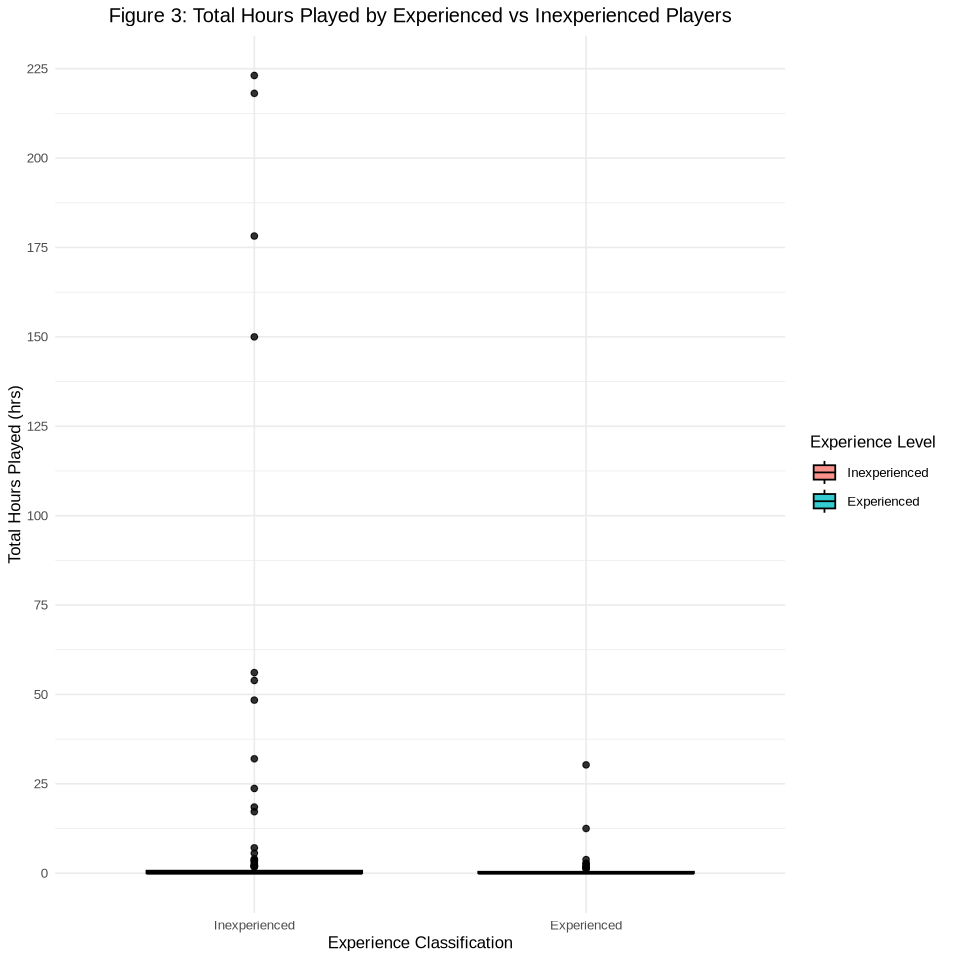

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)

vis3_hours_experience <- data_players |>
  ggplot(aes(x = experienced_binary, y = played_hours, fill = experienced_binary)) +
  geom_boxplot(alpha = 0.8, width = 0.65, color = "black") +
  scale_y_continuous(n.breaks = 10) +
  labs(title = "Figure 3: Total Hours Played by Experienced vs Inexperienced Players",
           x = "Experience Classification",
           y = "Total Hours Played (hrs)",
        fill = "Experience Level") +
  theme(legend.position = "right") +
  theme_minimal(base_size = 10) +
  theme(plot.title = element_text(hjust = 0.5))

vis3_hours_experience

<br>

**Visualization 4 - Age vs. Hours Played, Colored by Experience:**

The final visualization plots age on the x-axis and total hours played on the y-axis, with points colored according to the experience classification. This code enables exploration of possible interactions between age and hours played, and whether patterns emerge that distinguish experienced from inexperienced players. This scatterplot is especially helpful because it visualizes the two predictor variables together, allowing us to see whether combinations of age and hours played jointly relate to experience classification.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


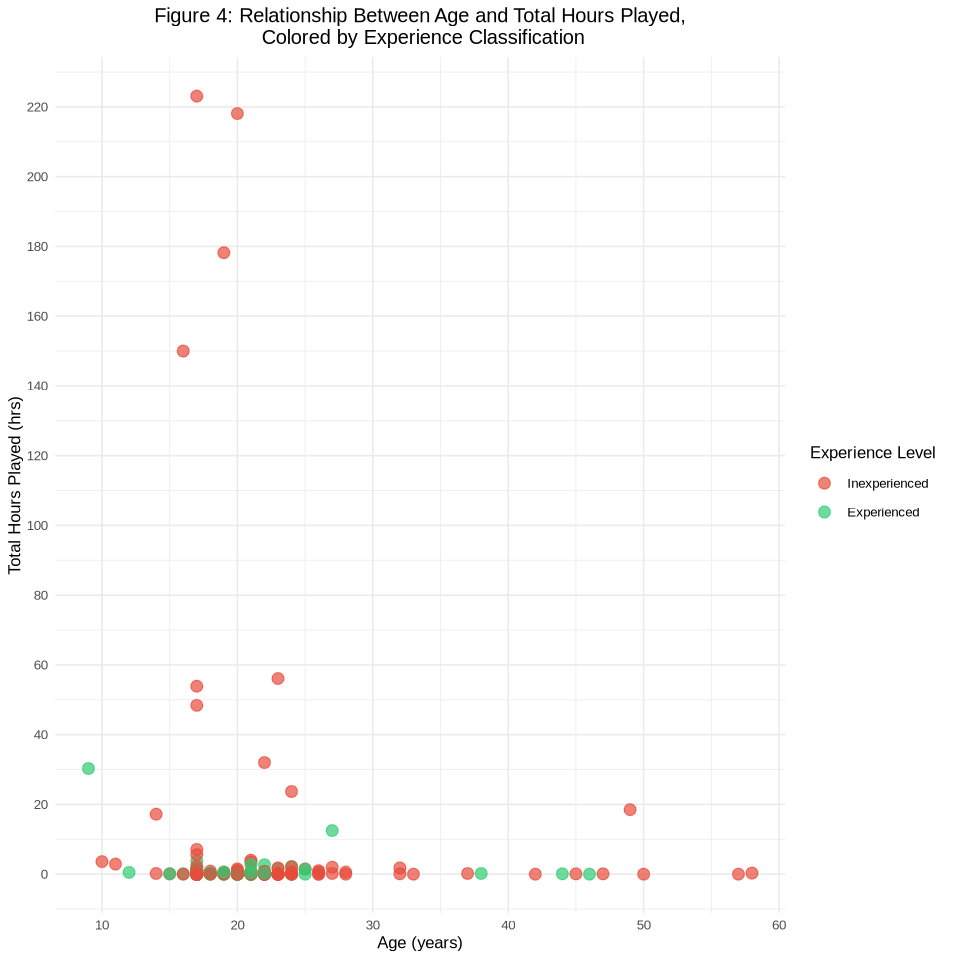

In [8]:
options(repr.plot.width = 8, repr.plot.height = 8)

vis4_age_hours_scatter <- data_players |>
  ggplot(aes(x = age, y = played_hours, color = experienced_binary)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_manual(values = c("Inexperienced" = "#E74C3C",
                                "Experienced" = "#2ECC71")) +
  scale_y_continuous(n.breaks = 15) + 
  labs(title = "Figure 4: Relationship Between Age and Total Hours Played,\n Colored by Experience Classification",
           x = "Age (years)",
           y = "Total Hours Played (hrs)",
       color = "Experience Level") +
  theme(legend.position = "right") +
  theme_minimal(base_size = 10) +
  theme(plot.title = element_text(hjust = 0.5))

vis4_age_hours_scatter

**K-Nearest Neighbours (KNN) classification modeling (data analysis)**

To answer our project’s specific question: whether age and total hours played can be used to predict whether a player is experienced or inexperienced, we fit a K-Nearest Neighbours (KNN) classification model. It is going to predict a class/catagory label a player falls into based on the most similar observations in the training dataset. We chose KNN because it is a simple, non-parametric model that makes minimal assumptions about the relationship between the predictors and the response. Since age and hours played may interact in nonlinear ways, KNN allows us to capture local patterns without imposing a rigid functional form.

In [9]:
knn_data <- data_players |>
  select(experienced_binary, age, played_hours)
head(knn_data)

experienced_binary,age,played_hours
<fct>,<dbl>,<dbl>
Experienced,9,30.3
Experienced,17,3.8
Experienced,17,0.0
Inexperienced,21,0.7
Inexperienced,21,0.1
Inexperienced,17,0.0


In [10]:
set.seed(123)
data_split <- initial_split(knn_data, prop = 0.8, strata = experienced_binary)

train_data <- training(data_split)
test_data  <- testing(data_split)
head(train_data)
head(test_data)

experienced_binary,age,played_hours
<fct>,<dbl>,<dbl>
Experienced,17,3.8
Experienced,17,0.0
Experienced,23,1.6
Experienced,17,0.0
Experienced,17,0.0
Experienced,23,0.0


experienced_binary,age,played_hours
<fct>,<dbl>,<dbl>
Experienced,9,30.3
Inexperienced,21,0.1
Experienced,22,0.0
Inexperienced,17,0.1
Inexperienced,21,0.7
Experienced,20,0.4


We split the cleaned dataset into a training set (80%) and a testing set (20%).
The model is trained only on the training data to avoid overfitting, and evaluated on the test data to measure how well it generalizes.

In [11]:
exp_recipe <- recipe(experienced_binary ~ age + played_hours, data = train_data) |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())
exp_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Centering for: all_predictors()

• Scaling for: all_predictors()



In [12]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

exp_workflow <- workflow() |>
  add_recipe(exp_recipe) |>
  add_model(knn_spec)

exp_fit <- exp_workflow |>
  fit(data = train_data)
exp_fit

Warning message:
“tune samples were requested but there were 156 rows in the data. 151 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3116883
Best kernel: rectangular
Best k: 151

Rather than choosing a single value for k arbitrarily, we specify: `neighbor = tune()`
This tells tidymodels to search for the value of k that produces the most accurate classifications using our predictor variables. Optimizing k allows us to build the most reliable model possible for distinguishing experience levels based on age and gameplay time.

In [13]:
set.seed(123)
knn_folds <- vfold_cv(train_data, v = 5, strata = experienced_binary)

To understand which value of k leads to the most accurate experience classification, we use 5-fold cross-validation on the training data.
In each fold, the model is trained on a subset of players and tested on the remaining ones, allowing us to evaluate how well different values of k generalize.
We also define a grid of candidate k values that represent different assumptions about how local or broad the neighbourhood should be when classifying a player.
This step directly supports our research question by helping us identify how many similar players the model needs to make reliable predictions of experience level.

In [14]:
set.seed(123)
k_grid <- tibble(neighbors = c(1, 3, 5, 7, 9, 11, 15))
knn_tuned <- tune_grid(exp_workflow, resamples = knn_folds, grid = k_grid, metrics = metric_set(accuracy))
best_k <- knn_tuned |>
  select_best(metric = "accuracy")
best_k

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 31 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 31 to size 29.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.config
<dbl>,<chr>
15,Preprocessor1_Model7


The `tune_grid()` function evaluates each candidate k value across all cross-validation folds.
For every combination, the model predicts whether players are experienced or inexperienced, and tidymodels computes accuracy.
This tuning step allows us to compare how different neighbourhood sizes affect the model’s ability to classify players correctly.
By systematically searching for the k with the highest accuracy, we ensure that our model uses age and played hours as effectively as possible to predict the experience category.

In [15]:
final_knn_workflow <- finalize_workflow(exp_workflow, best_k)
final_knn_fit <- final_knn_workflow |>
  fit(data = train_data)

After tuning, we extract the value of k that achieved the highest accuracy across the cross-validation folds.
This value represents the most effective balance between capturing local patterns (small k) and maintaining generality (large k) in this dataset.

We then insert the chosen k back into the workflow using finalize_workflow().
This produces our final, optimized classifier, which we fit on the full training set to prepare for evaluating how well age and played hours can truly predict player experience on unseen data.

In [16]:
test_predictions <- predict(final_knn_fit, new_data = test_data)

test_results <- test_data |>
  bind_cols(test_predictions)

mean(test_results$.pred_class == test_results$experienced_binary)

[1] 0.425

In [17]:
overall_accuracy <- mean(test_results$experienced_binary == test_results$.pred_class)
overall_accuracy

[1] 0.425

In [18]:
library(dplyr)

class_accuracy <- test_results |>
  group_by(experienced_binary) |>
  summarise(
    n          = n(),
    n_correct  = sum(experienced_binary == .pred_class),
    accuracy   = n_correct / n
  )

class_accuracy

experienced_binary,n,n_correct,accuracy
<fct>,<int>,<int>,<dbl>
Inexperienced,27,13,0.4814815
Experienced,13,4,0.3076923


**Visualization of the result**

**1) How accuracy changes across different values of k?**
We plot cross-validated accuracy for each candidate value of k to show how the choice of neighbourhood size influences classification performance. This helps justify why we selected the final value of k and provides insight into how well the model learned from the available predictors (age and played hours).

**2)Per-class accuracy on the test set?**
Since our goal is to classify players as Experienced or Inexperienced, we examine how well the model performs for each class separately.
This bar chart highlights whether the model is biased toward one class and whether both categories are equally predictable from the chosen variables.

These visualizations allow us to assess the strengths and limitations of age and played hours as predictors of player experience.

**Visualization 5 - Cross-validated accuracy for different values of k when doing KNN**

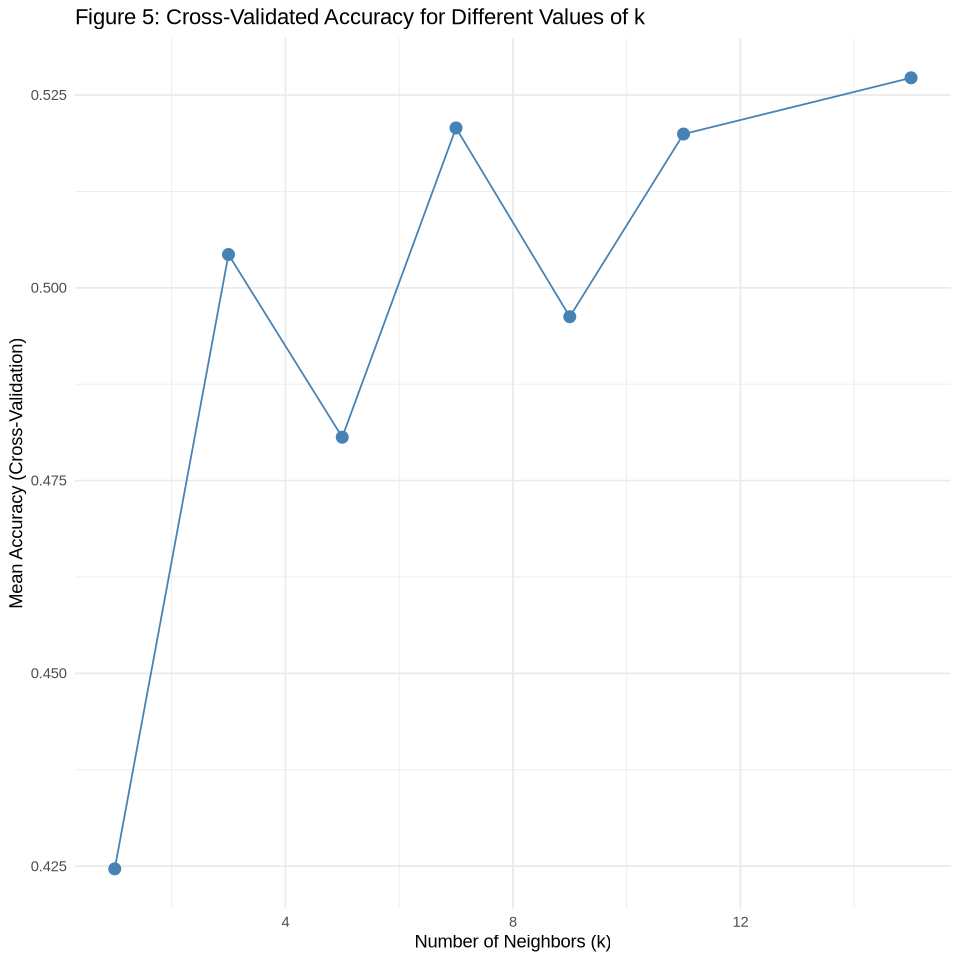

In [19]:
library(ggplot2)
library(dplyr)

# Collect metrics from tuning results
tuning_results <- knn_tuned |>
  collect_metrics()

# Plot accuracy as a function of k
accuracy_plot <- ggplot(tuning_results, aes(x = neighbors, y = mean)) +
  geom_point(size = 3, color = "steelblue") +
  geom_line(color = "steelblue") +
  labs(title = "Figure 5: Cross-Validated Accuracy for Different Values of k", x = "Number of Neighbors (k)", y = "Mean Accuracy (Cross-Validation)") +
  theme_minimal()
accuracy_plot

Figure 5 shows how the KNN model performed across the different values of k that we tested during cross-validation.
Although accuracy varies slightly between the tested values, the overall accuracy remains low (approximately 0.43–0.53). This pattern indicates that no value of k leads to strong predictive performance, suggesting that the relationship between the predictors (age and total hours played) and the experience categories is weak. The gradual increase in accuracy for larger values of k implies that the model performs slightly better when it relies on broader neighbourhoods of players, but even the best-performing k still yields accuracy close to random chance. This reinforces the idea that the available predictors do not provide enough separation between experienced and inexperienced players.

**Visualization 6 - Test-set per-class accuracy**

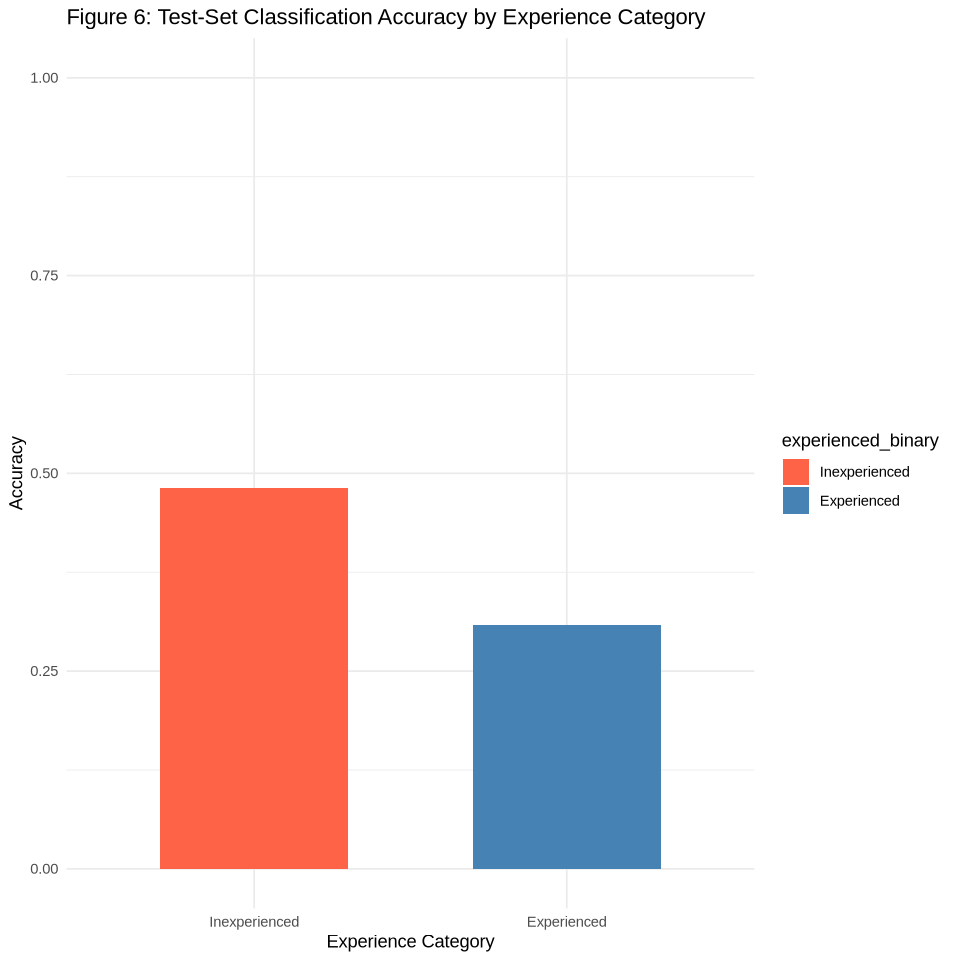

In [20]:
# Bar plot for test-set per-class accuracy
test_set_accuracy <- ggplot(class_accuracy, aes(x = experienced_binary, y = accuracy, fill = experienced_binary)) +
  geom_col(width = 0.6) +
  scale_fill_manual(values = c("tomato", "steelblue")) +
  ylim(0, 1) +
  labs(title = "Figure 6: Test-Set Classification Accuracy by Experience Category", x = "Experience Category", y = "Accuracy") +
  theme_minimal() 
test_set_accuracy

Figure 6 displays the model’s accuracy for each experience category on the held-out test set. The model correctly classified about ~50% of inexperienced players but only ~30% of experienced players. This large discrepancy shows that the model is strongly biased toward predicting the majority class (Inexperienced), which is expected because KNN heavily depends on local patterns in the data. Since many experienced players in the dataset share the same ages and low recorded play hours as inexperienced players, the model struggles to distinguish between the two groups, leading to the misclassification of most experienced players.

Together, these visualizations show that age and total hours played are not strong predictors of player experience, and that the KNN classifier, even after tuning, cannot reliably identify experienced players. This provides clear evidence that the current features are insufficient for accurate classification. Better predictors (such as number of sessions, in-game performance, or activity level over time) would be needed to improve model accuracy.

**Visualization 7 - Predictions vs Actual value**

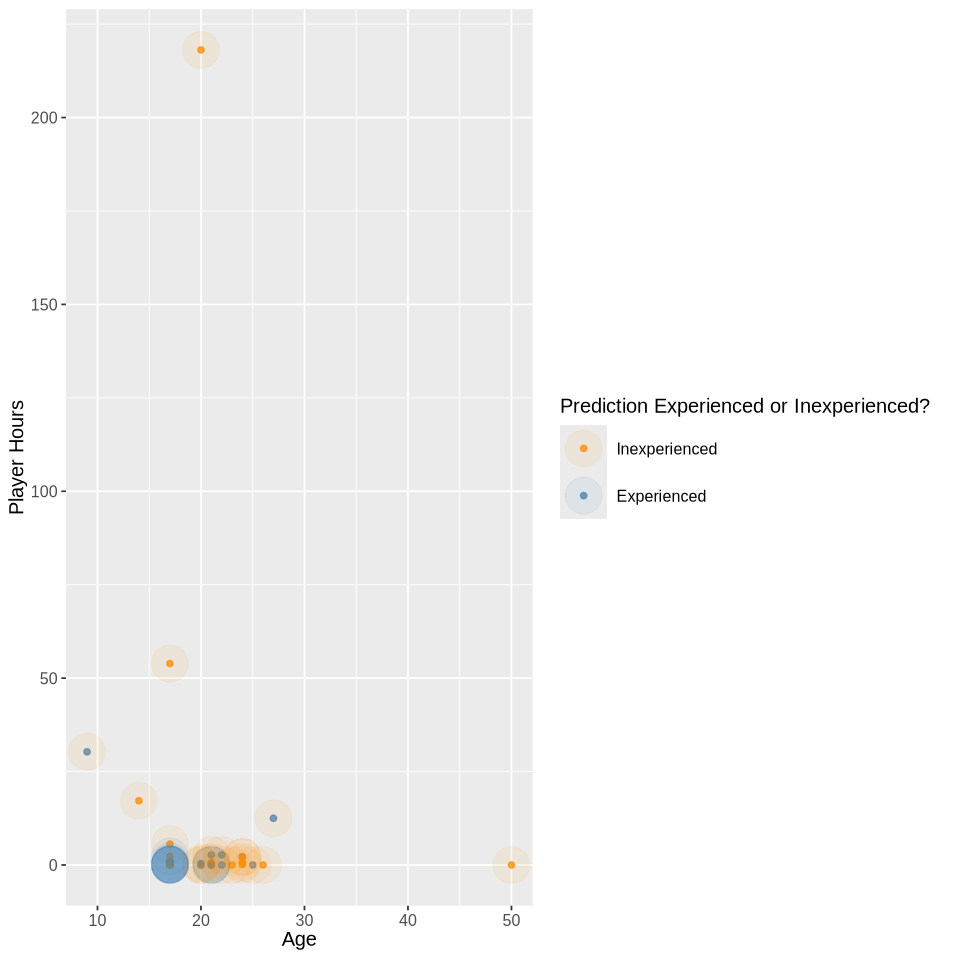

In [21]:
wkflw_plot <-
  ggplot() +
  geom_point(data = test_results,
             mapping = aes(x = age,
                           y = played_hours,
                           color = experienced_binary),
             alpha = 0.75) +
  geom_point(data = test_results,
             mapping = aes(x = age,
                           y = played_hours,
                           color = .pred_class),
             alpha = 0.08,
             size = 10) + 
  labs(color = "Prediction Experienced or Inexperienced?",
       x = "Age",
       y = "Player Hours") +
  scale_color_manual(values = c("darkorange", "steelblue")) +
  theme(text = element_text(size = 12))
# the faded out bigger circle is the predicted, the small solid circle is the actual value
wkflw_plot

## 3. Discussion 

Overall, we found that there was no strong correlation between a player's age and gameplay duration with their experience level. This was shown by the low level of accuracy when it came to predicting a players experience using KNN classification. This was not what we anticipated to find as we expected there to be more distinction between the two groups (experienced v.s. inexperienced) with a higher level of accuracy. We initially thought that younger players would have more gameplay hours and would better predict experienced players, while more mature players would have less gameplay hours, which would cause them to be classified as inexperienced. Also, because the dataset is highly imbalanced (the majority of players are inexperienced), the model tends to predict the majority class, which lowers accuracy for experienced players.


This shows that age and total hours played are not useful for predicting whether a player is experienced. Because of this we couldn’t really find what kind of players contribute more data. Instead, we need to consider other variables such as number of sessions or in-game activity which may give better predictions. This leads to new questions about which features do separate experienced and inexperienced players. It could be helpful to try other models and check whether the self-reported experience level actually matches how players behave in the game.

## 4. Github Repository
https://github.com/gaida123/dsci-100-008-group-6.git